In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

/tmp/ipykernel_1663992/65408254.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [6]:
env_name = "WallEnv"
runs_dir = '../runs3'
runs = [os.path.join(runs_dir, d) for d in os.listdir(runs_dir) if os.path.isdir(os.path.join(runs_dir, d))]
results = [os.path.join(d, "results.csv") for d in runs if os.path.exists(os.path.join(d, 'results.csv'))]
results = [result for result in results if env_name in result]
results

['../runs3/WallEnv-v0__minigrid-test-ppo__1__1710133972/results.csv',
 '../runs3/WallEnv-v0__minigrid-test-ppo__1__1710124110/results.csv',
 '../runs3/WallEnv-v0__minigrid-test-ppo__1__1710130526/results.csv',
 '../runs3/WallEnv-v0__minigrid-test-ppo__1__1710138111/results.csv']

In [7]:
dfs = [pd.read_csv(r) for r in results]
dfs[1]

,# Total Parameters,# Total Neurons,Model Summary,Environment,Size,Use Lava,Average Test Reward,Test Reward Variance
0,34880,34880,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,6,False,0.663937,0.313733
1,108328,108328,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,6,False,0.746750,0.271814
2,115576,115576,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,6,False,0.773625,0.262339
3,111448,111448,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,6,False,0.797297,0.250154
4,38896,38896,"Sequential(\n (0): Conv2d(3, 8, kernel_size=(...",WallEnv-v0,6,False,0.787856,0.255831


In [8]:
combined_df = pd.concat(dfs, ignore_index=True)
average_rewards = combined_df.groupby(['# Total Parameters', 'Size'])[['Average Test Reward', 'Test Reward Variance']].mean().reset_index()
pivoted_data = average_rewards.pivot(index='Size', columns='# Total Parameters', values=['Average Test Reward', 'Test Reward Variance'])
pivoted_data

Average Test Reward                                \
# Total Parameters              34880     38896     108328    111448   
Size                                                                   
6                             0.663937  0.787856  0.746750  0.797297   
8                             0.840988  0.810570  0.826293  0.827730   
10                            0.524311  0.591675  0.557111  0.565675   
12                            0.668320  0.474898  0.627996  0.516623   

                             Test Reward Variance                      \
# Total Parameters    115576               34880     38896     108328   
Size                                                                    
6                   0.773625             0.313733  0.255831  0.271814   
8                   0.831923             0.228134  0.280450  0.250987   
10                  0.483991             0.441618  0.438844  0.436351   
12                  0.500492             0.431409  0.453634  0.436636   

                                        
# Total Parameters    111448    115576  
Size                                    
6                   0.250154  0.262339  
8                   0.265260  0.253236  
10                  0.443300  0.449134  
12                  0.452088  0.454715

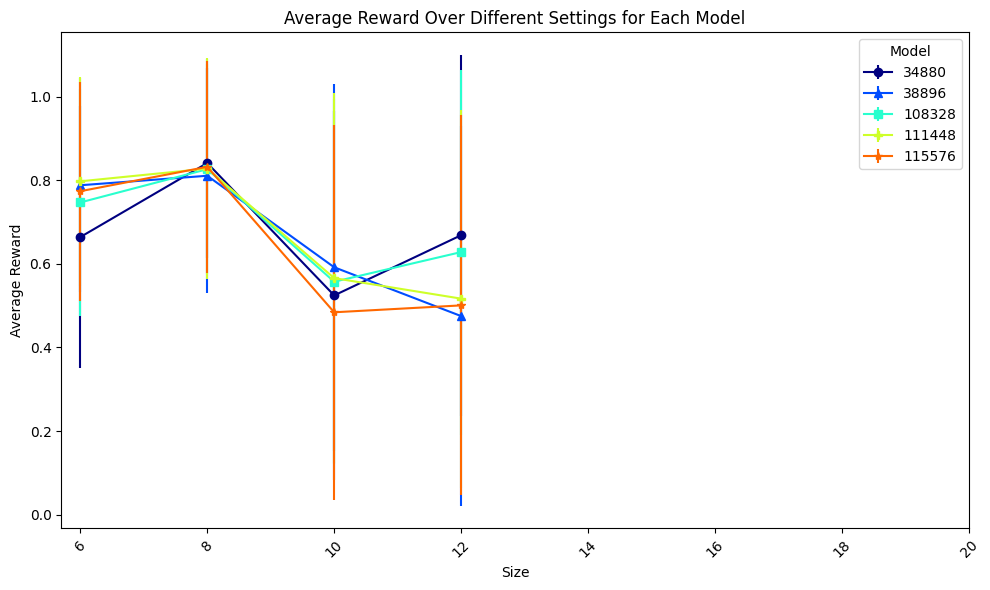

In [9]:
import itertools
import matplotlib.colors as mcolors

plt.figure(figsize=(10, 6))

cmap = plt.cm.jet
norm = mcolors.Normalize(vmin=0, vmax=len(combined_df['# Total Parameters'].unique()))

markers = itertools.cycle(['o', '^', 's', 'P', '*', 'x', 'D', '+'])
for i, column in enumerate(pivoted_data['Average Test Reward'].columns):
    plt.errorbar(pivoted_data['Average Test Reward'][column].index.values,
             pivoted_data['Average Test Reward'][column].values,
             marker=next(markers),
             label=column,
             yerr=pivoted_data['Test Reward Variance'][column].values,
             color=cmap(norm(i)))

plt.title('Average Reward Over Different Settings for Each Model')
plt.xlabel('Size')
plt.ylabel('Average Reward')
# settings = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
settings = [6, 8, 10, 12, 14, 16, 18, 20]
plt.xticks(settings, rotation=45)
plt.legend(title='Model')
plt.tight_layout()
plt.show()